##  Build a small feedforward NN on MNIST digits (only 1 hidden layer).

In [2]:
#### Preparing the dataset  


import torch 
from torchvision import datasets 
import torchvision



In [12]:
from torchvision import datasets,transforms

transform = transforms.ToTensor()


dataset = torchvision.datasets.MNIST('./datasets/MNSIT',download=True,transform=transform)

In [13]:


data_loader = torch.utils.data.DataLoader(dataset,batch_size=4,shuffle=True)

Images shape: torch.Size([4, 1, 28, 28])
Labels tensor([7, 7, 5, 4])


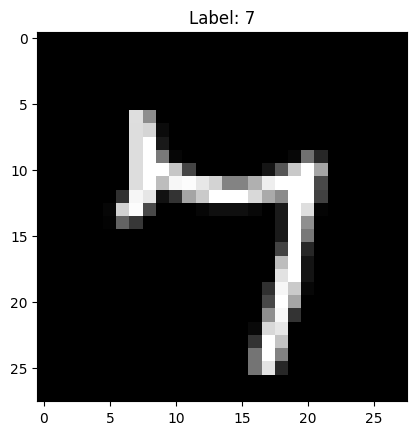

In [14]:
images,labels = next(iter(data_loader))

print("Images shape:",images.shape)
print("Labels",labels)

import matplotlib.pyplot as plt 

plt.imshow(images[0].squeeze(),cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.show()

#### Here I downloaded the mnist dataset the  you can see images shape , where batch size 4 and image shape is 1,28,28 


### Let me also check how many unqiue labels or numbers are there in dataset 

In [17]:
### 



unique_labels = torch.unique(dataset.targets)

print("Unique labels in MNIST dataset",unique_labels,"and the count is ",len(unique_labels))

Unique labels in MNIST dataset tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) and the count is  10


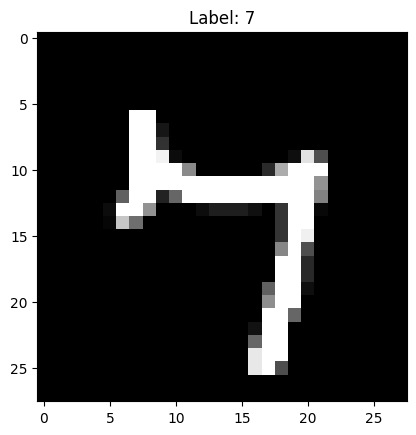

In [31]:
from matplotlib.colors import Normalize
plt.imshow(images[0].squeeze(),cmap='gray',norm=Normalize(vmin=0, vmax=0.5))
plt.title(f"Label: {labels[0].item()}")
plt.show()

## Let's check the dataloader size  

15000 

In [35]:
len(data_loader)

15000

#### Let's build the network architecture 

In [45]:
input_image_size = 28 * 28 
one_hidden_layer = 128 
output_layer_size = len(unique_labels)
activation_function = "Relu"

#### Split the dataset in to train and test dataset 

In [46]:
from pydash import shuffle
from torch.utils.data import random_split


total_size = len(dataset)

train_size = int(0.8 * total_size)
test_size = total_size - train_size 

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=4,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=4,shuffle=False)

print("Training set size",len(train_dataset))
print("Testing set size",len(test_dataset))

Training set size 48000
Testing set size 12000


In [47]:
import torch 


In [48]:
class MNIST(torch.nn.Module):
    def __init__(self,input_image_size,output_layer_size,hidden_layers):
        super(MNIST,self).__init__()

        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(input_image_size,hidden_layers)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_layers,output_layer_size)

    def forward(self,x):

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x




        

In [49]:
model = MNIST(input_image_size=input_image_size,output_layer_size=output_layer_size,hidden_layers=one_hidden_layer)

In [52]:
### what are the loss functions 


loss_fn = torch.nn.CrossEntropyLoss()


In [53]:
import torch.optim as optim 

optimizer = optim.Adam(model.parameters(),lr=0.01)

In [55]:
### Training the dataset


num_epochs = 10


for epoch in range(num_epochs):

    print(f"Epoch : {epoch+1}/{num_epochs}")

    for batch_idx, (inputs,targets) in enumerate(train_loader):

        predictions = model(inputs)

        loss = loss_fn(predictions,targets)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch_idx % 1000 == 0:
            print(f"Batch {batch_idx+1}, loss: {loss.item():.4f}")

Epoch : 1/10
Batch 1, loss: 0.0000
Batch 1001, loss: 0.0507
Batch 2001, loss: 0.0002
Batch 3001, loss: 1.4075
Batch 4001, loss: 0.0123
Batch 5001, loss: 0.0124
Batch 6001, loss: 0.0012
Batch 7001, loss: 0.0002
Batch 8001, loss: 0.3464
Batch 9001, loss: 0.0036
Batch 10001, loss: 0.0131
Batch 11001, loss: 0.0000
Epoch : 2/10
Batch 1, loss: 1.9388
Batch 1001, loss: 0.0001
Batch 2001, loss: 0.0020
Batch 3001, loss: 1.7309
Batch 4001, loss: 0.0010
Batch 5001, loss: 0.0005
Batch 6001, loss: 0.8255
Batch 7001, loss: 0.0001
Batch 8001, loss: 2.6252
Batch 9001, loss: 0.0000
Batch 10001, loss: 0.1807
Batch 11001, loss: 0.0004
Epoch : 3/10
Batch 1, loss: 0.6139
Batch 1001, loss: 0.0001
Batch 2001, loss: 0.0022
Batch 3001, loss: 0.0009
Batch 4001, loss: 0.8900
Batch 5001, loss: 0.0012
Batch 6001, loss: 0.1527
Batch 7001, loss: 0.0248
Batch 8001, loss: 0.0012
Batch 9001, loss: 0.0148
Batch 10001, loss: 0.3168
Batch 11001, loss: 0.0148
Epoch : 4/10
Batch 1, loss: 0.5730
Batch 1001, loss: 0.2233
Batc

In [56]:
#### Evaluation Loop 

model.eval()



MNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [64]:
def evaluate_model(model,eval_dataloader,criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0 

    with torch.no_grad():
        for inputs,labels in eval_dataloader:
            outputs = model(inputs)

            loss = criterion(outputs,labels)

            batch_size = labels.size()

            print(batch_size[0], labels.size())
            total_loss += loss.item() * batch_size[0]

            total_samples += batch_size[0]

            _ , predicted = torch.max(outputs.data,1)

            correct_predictions += (predicted == labels).sum().item()

    
    avg_loss = total_loss / total_samples

    accuracy = 100 * correct_predictions / total_samples


    return avg_loss,accuracy


            



loss, accuracy  = evaluate_model(model,test_loader,loss_fn)


4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Size([4])
4 torch.Si

In [65]:
loss,accuracy

(0.5097919149192779, 92.8)

In [67]:
def random_test(images,labels):

    with torch.no_grad():
        outputs = model(images)

        _, predicted = torch.max(outputs.data,1)
    num_samples = len(images)
    fig,axes = plt.subplots(1,num_samples,figsize=(15,3))

    for i in range(num_samples):
        axes[i].imshow(images[i].squeeze(),cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f'Pred : {predicted[i]} \n True : {labels[i]} ')

        

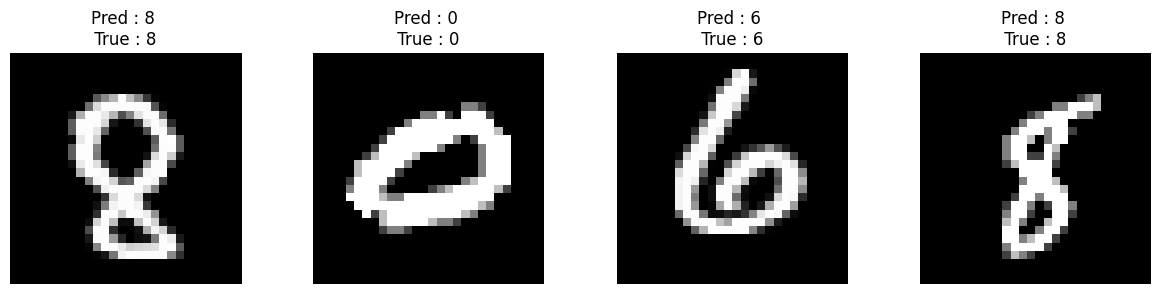

In [68]:
images , labels = next(iter(test_loader))

random_test(images,labels)

In [69]:
def analyze_model(model):
    # Print model architecture
    print("Model Architecture:")
    print(model)
    print("\nModel Parameters:")
    
    # Analyze weights
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"\n{name} statistics:")
            print(f"Mean: {param.data.mean():.4f}")
            print(f"Std: {param.data.std():.4f}")
            print(f"Min: {param.data.min():.4f}")
            print(f"Max: {param.data.max():.4f}")
            
            # Visualize weight distributions
            plt.figure(figsize=(6, 4))
            plt.hist(param.data.flatten().cpu().numpy(), bins=50)
            plt.title(f'{name} Distribution')
            plt.xlabel('Weight Value')
            plt.ylabel('Count')
            plt.show()

Model Architecture:
MNIST(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Model Parameters:

fc1.weight statistics:
Mean: -0.0988
Std: 1.0130
Min: -19.5413
Max: 10.8088


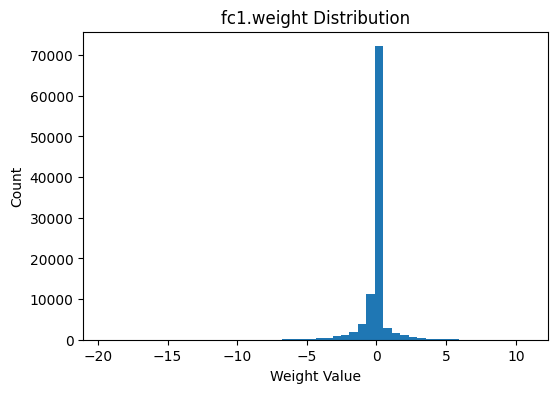


fc2.weight statistics:
Mean: -0.9709
Std: 1.8176
Min: -16.3196
Max: 1.0838


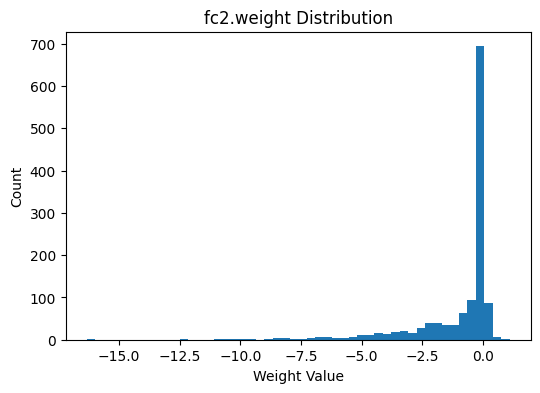

In [70]:
analyze_model(model)

In [73]:
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, './models/mnist_checkpoint.pth')

In [74]:
# First define the model architecture
model = MNIST(input_image_size=input_image_size, 
              output_layer_size=output_layer_size, 
              hidden_layers=one_hidden_layer)

# Then load the saved state
model.load_state_dict(torch.load('./models/mnist_checkpoint.pth'))
model.eval()  # Set to evaluation mode

C:\Users\Kavitha padala\AppData\Local\Temp\ipykernel_31024\1823779000.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./models/mnist_ch

RuntimeError: Error(s) in loading state_dict for MNIST:
	Missing key(s) in state_dict: "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias". 
	Unexpected key(s) in state_dict: "epoch", "model_state_dict", "optimizer_state_dict", "loss". 